# Gun Violence Dataset in US

## Installations

In [2]:
# !pip3 install --upgrade pip

In [3]:
# %pip install geopandas
# %pip install folium
# %pip install tabulate

## Imports

In [4]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [5]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


## Import Dataset

In [6]:
df = geopandas.read_file("updated_with_coordinates.csv")

df

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,,35.6139,-88.8194,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,,33.11464,-90.05281,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2794194,"January 4, 2024",Iowa,Perry,1200 18th St,2,5,1,0,0,,41.83854,-94.1056,Yes
423,2792720,"January 1, 2024",Missouri,Springfield,5485 W Sunshine St,0,4,0,0,1,,37.20897,-93.29159,Yes
424,2792829,"January 1, 2024",Louisiana,Baton Rouge,4600 block of W Brookstown Dr,1,3,0,0,3,,30.44335,-91.18664,Yes
425,2791411,"January 1, 2024",California,Los Angeles,2350 Porter St,2,8,0,0,0,,34.05357,-118.24545,Yes


In [7]:
df.describe(include='all')

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
count,427,427,427,427,427,427,427,427,427,427,427,427,427,427
unique,427,188,43,235,427,8,21,3,3,8,1,240,240,1
top,3052758,"March 31, 2024",Illinois,Chicago,7700 block of Lake Alice Rd SE,0,4,0,0,0,,41.88425,-87.63245,Yes
freq,1,9,32,25,1,181,119,398,403,254,427,25,25,427


### Retrieve Unique Values & Value counts

In [8]:
cols_to_check = [
    "State",
    "Victims Killed",
    "Victims Injured",
    "Suspects Killed",
    "Suspects Injured",
    "Suspects Arrested"
]

for col in cols_to_check:
    u_vals = np.sort(df[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

State (43)
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'Ohio' 'Oklahoma' 'Pennsylvania' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin']

Victims Killed (8)
['0' '1' '2' '3' '4' '5' '6' '8']

Victims Injured (21)
['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '19' '2' '22' '28' '3'
 '4' '5' '6' '7' '8' '9']

Suspects Killed (3)
['0' '1' '2']

Suspects Injured (3)
['0' '1' '2']

Suspects Arrested (8)
['0' '1' '2' '3' '4' '5' '6' '7']



### Remove columns

In [9]:
cols_to_remove = [
    "Operations",
    "Coordinates_Found"
]

df.drop(columns=cols_to_remove, inplace=True)

df.describe(include='all')

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude
count,427,427,427,427,427,427,427,427,427,427,427,427
unique,427,188,43,235,427,8,21,3,3,8,240,240
top,3052758,"March 31, 2024",Illinois,Chicago,7700 block of Lake Alice Rd SE,0,4,0,0,0,41.88425,-87.63245
freq,1,9,32,25,1,181,119,398,403,254,25,25


In [10]:
### Rename Columns
cols_to_rename = {
    "Incident ID": "incident_id",
    "Incident Date": "incident_date",
    "State": "state",
    "City Or County": "city_or_country",
    "Address": "address",
    "Victims Killed": "victims_killed",
    "Victims Injured": "victims_injured",
    "Suspects Killed": "suspects_killed",
    "Suspects Injured": "suspects_injured",
    "Suspects Arrested": "suspects_arrested",
    "Latitude": "latitude",
    "Longitude": "longitude"
}

df.rename(columns=cols_to_rename, inplace=True)

df.head()

,incident_id,incident_date,state,city_or_country,address,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,latitude,longitude
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,47.56812,-121.89086
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,35.6139,-88.8194
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,30.44335,-91.18664
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,39.95222,-75.16218
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,33.11464,-90.05281


## Create the Geometry Column; Then Remove Original Latitude & Longitude Columns

In [11]:
gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

gdf.drop(columns=["latitude", "longitude"], inplace=True)

gdf.head()

,incident_id,incident_date,state,city_or_country,address,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,geometry
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,POINT (-121.89086 47.56812)
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,POINT (-88.8194 35.6139)
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,POINT (-91.18664 30.44335)
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,POINT (-75.16218 39.95222)
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,POINT (-90.05281 33.11464)


## Data Visualization(s)

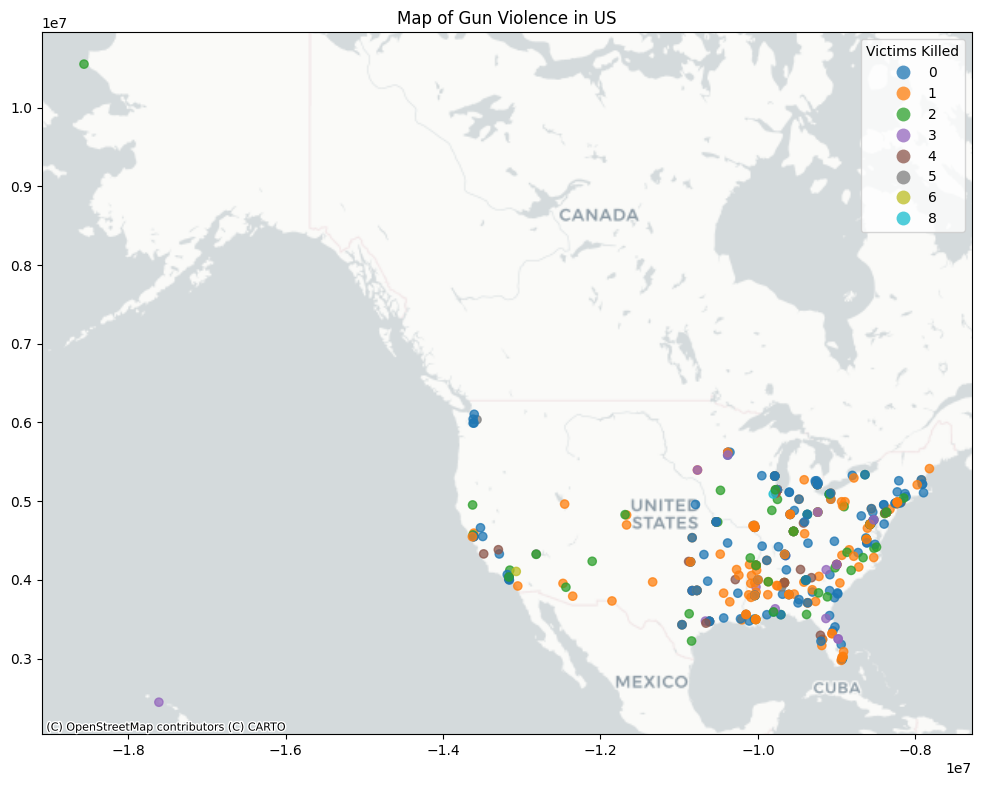

In [12]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_plot.plot(
    column='victims_killed', 
    ax=ax, 
    alpha=0.75, 
    legend=True,
    legend_kwds={
        'title': 'Victims Killed'
    }
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Gun Violence in US")

plt.show()

## 

In [13]:
gdf.explore(
    m = folium.Map(
        location=[40, -95], 
        tiles='OpenStreetMap',
        zoom_start=4,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 1,
        'opacity': 0.85,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.75
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 5,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.75
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            "Incident ID",
            "Incident Date",
            "State",
            "City Or County",
            "Address",
            "Victims Killed",
            "Victims Injured",
            "Suspects Killed",
            "Suspects Injured",
            "Suspects Arrested"
        ]
    }
)


## Time For Fun With Functions

### Append Geometry Type Feature to GeoDataFrame

In [14]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,incident_id,incident_date,state,city_or_country,address,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,geometry,geometry_type
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,POINT (-121.89086 47.56812),Point
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,POINT (-88.8194 35.6139),Point
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,POINT (-91.18664 30.44335),Point
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,POINT (-75.16218 39.95222),Point
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,POINT (-90.05281 33.11464),Point
...,...,...,...,...,...,...,...,...,...,...,...,...
422,2794194,"January 4, 2024",Iowa,Perry,1200 18th St,2,5,1,0,0,POINT (-94.1056 41.83854),Point
423,2792720,"January 1, 2024",Missouri,Springfield,5485 W Sunshine St,0,4,0,0,1,POINT (-93.29159 37.20897),Point
424,2792829,"January 1, 2024",Louisiana,Baton Rouge,4600 block of W Brookstown Dr,1,3,0,0,3,POINT (-91.18664 30.44335),Point
425,2791411,"January 1, 2024",California,Los Angeles,2350 Porter St,2,8,0,0,0,POINT (-118.24545 34.05357),Point


### Add Distance Features to Dataset

In [15]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [16]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

,incident_id,incident_date,state,city_or_country,address,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,geometry,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,POINT (132169.165 5279901.249),4.176861e+06,4.176861e+06,4.176861e+06
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,POINT (3083080.06 4329473.685),1.920368e+06,1.920368e+06,1.920368e+06
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,POINT (3018916.291 3668286.173),2.505251e+06,2.505251e+06,2.505251e+06
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,POINT (4104493.464 5358971.469),5.072109e+05,5.072109e+05,5.072109e+05
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,POINT (3050196.629 4007069.385),2.200825e+06,2.200825e+06,2.200825e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2794194,"January 4, 2024",Iowa,Perry,1200 18th St,2,5,1,0,0,POINT (2405356.067 4893165.027),2.091723e+06,2.091723e+06,2.091723e+06
423,2792720,"January 1, 2024",Missouri,Springfield,5485 W Sunshine St,0,4,0,0,1,POINT (2618833.691 4392124.414),2.195857e+06,2.195857e+06,2.195857e+06
424,2792829,"January 1, 2024",Louisiana,Baton Rouge,4600 block of W Brookstown Dr,1,3,0,0,3,POINT (3018916.291 3668286.173),2.505251e+06,2.505251e+06,2.505251e+06
425,2791411,"January 1, 2024",California,Los Angeles,2350 Porter St,2,8,0,0,0,POINT (385054.238 3768795.372),4.402982e+06,4.402982e+06,4.402982e+06


### Retrieve Coordinates

In [17]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x         y   z
0   -121.89086  47.56812 NaN
1    -88.81940  35.61390 NaN
2    -91.18664  30.44335 NaN
3    -75.16218  39.95222 NaN
4    -90.05281  33.11464 NaN
..         ...       ...  ..
422  -94.10560  41.83854 NaN
423  -93.29159  37.20897 NaN
424  -91.18664  30.44335 NaN
425 -118.24545  34.05357 NaN
426  -87.83922  41.88796 NaN

[427 rows x 3 columns]

GDF Count Coordinates:
0      1
1      1
2      1
3      1
4      1
      ..
422    1
423    1
424    1
425    1
426    1
Length: 427, dtype: int32

GDF Count Geometries:
0      1
1      1
2      1
3      1
4      1
      ..
422    1
423    1
424    1
425    1
426    1
Length: 427, dtype: int32


### Some Basic Functions

In [18]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    427
dtype: int64

is_valid:
True    427
dtype: int64

is_valid_reason:
Valid Geometry    427
dtype: int64

has_z:
False    427
dtype: int64



### Check if Points Are Within Mapped Polygons

In [19]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, incident_id, incident_date, state, city_or_country, address, victims_killed, victims_injured, suspects_killed, suspects_injured, suspects_arrested]
Index: []


### Check if Points Are NOT Within Mapped Polygons

In [20]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


### Some More Functions

In [21]:
gdf.boundary

0      GEOMETRYCOLLECTION EMPTY
1      GEOMETRYCOLLECTION EMPTY
2      GEOMETRYCOLLECTION EMPTY
3      GEOMETRYCOLLECTION EMPTY
4      GEOMETRYCOLLECTION EMPTY
                 ...           
422    GEOMETRYCOLLECTION EMPTY
423    GEOMETRYCOLLECTION EMPTY
424    GEOMETRYCOLLECTION EMPTY
425    GEOMETRYCOLLECTION EMPTY
426    GEOMETRYCOLLECTION EMPTY
Length: 427, dtype: geometry

In [22]:
gdf_projected.buffer(distance=125)

0      POLYGON ((132294.165 5279901.249, 132293.563 5...
1      POLYGON ((3083205.06 4329473.685, 3083204.458 ...
2      POLYGON ((3019041.291 3668286.173, 3019040.689...
3      POLYGON ((4104618.464 5358971.469, 4104617.862...
4      POLYGON ((3050321.629 4007069.385, 3050321.027...
                             ...                        
422    POLYGON ((2405481.067 4893165.027, 2405480.465...
423    POLYGON ((2618958.691 4392124.414, 2618958.089...
424    POLYGON ((3019041.291 3668286.173, 3019040.689...
425    POLYGON ((385179.238 3768795.372, 385178.636 3...
426    POLYGON ((2926892.004 5069483.249, 2926891.402...
Length: 427, dtype: geometry

In [23]:
gdf_projected.centroid

0       POINT (132169.165 5279901.249)
1       POINT (3083080.06 4329473.685)
2      POINT (3018916.291 3668286.173)
3      POINT (4104493.464 5358971.469)
4      POINT (3050196.629 4007069.385)
                    ...               
422    POINT (2405356.067 4893165.027)
423    POINT (2618833.691 4392124.414)
424    POINT (3018916.291 3668286.173)
425     POINT (385054.238 3768795.372)
426    POINT (2926767.004 5069483.249)
Length: 427, dtype: geometry

In [24]:
gdf.convex_hull

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [25]:
gdf.envelope

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [26]:
gdf.extract_unique_points()

0      MULTIPOINT (-121.89086 47.56812)
1         MULTIPOINT (-88.8194 35.6139)
2       MULTIPOINT (-91.18664 30.44335)
3       MULTIPOINT (-75.16218 39.95222)
4       MULTIPOINT (-90.05281 33.11464)
                     ...               
422      MULTIPOINT (-94.1056 41.83854)
423     MULTIPOINT (-93.29159 37.20897)
424     MULTIPOINT (-91.18664 30.44335)
425    MULTIPOINT (-118.24545 34.05357)
426     MULTIPOINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [27]:
gdf.force_2d()

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [28]:
gdf.minimum_bounding_circle()

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [29]:
gdf.minimum_clearance()

0      inf
1      inf
2      inf
3      inf
4      inf
      ... 
422    inf
423    inf
424    inf
425    inf
426    inf
Length: 427, dtype: float64

In [30]:
gdf.minimum_rotated_rectangle()

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [31]:
gdf.normalize()

0      POINT (-121.89086 47.56812)
1         POINT (-88.8194 35.6139)
2       POINT (-91.18664 30.44335)
3       POINT (-75.16218 39.95222)
4       POINT (-90.05281 33.11464)
                  ...             
422      POINT (-94.1056 41.83854)
423     POINT (-93.29159 37.20897)
424     POINT (-91.18664 30.44335)
425    POINT (-118.24545 34.05357)
426     POINT (-87.83922 41.88796)
Length: 427, dtype: geometry

In [32]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Polygons

In [33]:
translated_gdf = gdf.translate(xoff=-0.05, yoff=0.05)

translated_gdf.explore()

### Iterate Through All Rows

In [34]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: incident_id                                 3052758
incident_date                      October 21, 2024
state                                    Washington
city_or_country                           Fall City
address              7700 block of Lake Alice Rd SE
victims_killed                                    5
victims_injured                                   1
suspects_killed                                   0
suspects_injured                                  0
suspects_arrested                                 1
geometry                POINT (-121.89086 47.56812)
Name: 0, dtype: object
All Data: incident_id                           3052028
incident_date                October 20, 2024
state                               Tennessee
city_or_country                       Jackson
address                   2310 N Highland Ave
victims_killed                              1
victims_injured                             8
suspects_killed                             0
suspects_injured 

### Iterate Through All Features

In [35]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'incident_id': '3052758', 'incident_date': 'October 21, 2024', 'state': 'Washington', 'city_or_country': 'Fall City', 'address': '7700 block of Lake Alice Rd SE', 'victims_killed': '5', 'victims_injured': '1', 'suspects_killed': '0', 'suspects_injured': '0', 'suspects_arrested': '1'}, 'geometry': {'type': 'Point', 'coordinates': (-121.89086, 47.56812)}}
{'id': '1', 'type': 'Feature', 'properties': {'incident_id': '3052028', 'incident_date': 'October 20, 2024', 'state': 'Tennessee', 'city_or_country': 'Jackson', 'address': '2310 N Highland Ave', 'victims_killed': '1', 'victims_injured': '8', 'suspects_killed': '0', 'suspects_injured': '0', 'suspects_arrested': '0'}, 'geometry': {'type': 'Point', 'coordinates': (-88.8194, 35.6139)}}
{'id': '2', 'type': 'Feature', 'properties': {'incident_id': '3051984', 'incident_date': 'October 20, 2024', 'state': 'Louisiana', 'city_or_country': 'Baton Rouge', 'address': '9700 block of Greenwell Springs Rd',

### Interface

In [36]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'incident_id': '3052758',
    'incident_date': 'October 21, 2024',
    'state': 'Washington',
    'city_or_country': 'Fall City',
    'address': '7700 block of Lake Alice Rd SE',
    'victims_killed': '5',
    'victims_injured': '1',
    'suspects_killed': '0',
    'suspects_injured': '0',
    'suspects_arrested': '1'},
   'geometry': {'type': 'Point', 'coordinates': (-121.89086, 47.56812)},
   'bbox': (-121.89086, 47.56812, -121.89086, 47.56812)},
  {'id': '1',
   'type': 'Feature',
   'properties': {'incident_id': '3052028',
    'incident_date': 'October 20, 2024',
    'state': 'Tennessee',
    'city_or_country': 'Jackson',
    'address': '2310 N Highland Ave',
    'victims_killed': '1',
    'victims_injured': '8',
    'suspects_killed': '0',
    'suspects_injured': '0',
    'suspects_arrested': '0'},
   'geometry': {'type': 'Point', 'coordinates': (-88.8194, 35.6139)},
   'bbox': (-88.819

## Save Cleaned Dataset to File

In [37]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/